# Sprite Attitude and Orbital Dynamics

#### V. Hunter Adams (vha3@cornell.edu)

In [1]:
from IPython.display import Latex
import matplotlib.pyplot as plt
%matplotlib inline
import numpy
import numpy.linalg
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D
import random
from numpy.linalg import pinv

Ultimately, the orbital dynamics model for the Sprites will include first and second-order gravitational terms, solar pressure, and atmospheric drag. Higher-order geopotential terms and third-body perturbations are neglected because they are negligibly small in comparison to the dominant terms and perturbations. For sake of testing, the models for both orbital and attitude dynamics will be built up modularly. For a first iteration, the orbital dynamics will include only the first two terms of the geopotential model, omitting external forces.

## Assumptions

1. The magnetic field is static, always pointing North
2. The antennae can be modeled as a Kane Damper
3. Higher-than-J2 gravitational terms are negligible
4. Third-body gravitational perturbations are negligible
5. Drag and solar pressure are dominant sources of external force/torque

## Orbital Dynamics

### Theory

The Lagrangian for the spacecraft is formed by subtracting the potential from the kinetic energy:

\begin{align}
\mathcal{L} &= T-V
\end{align}

#### Kinetic Energy

We will operate in an Earth-Centered Inertial coordinate frame. This places the origin on the center of the Earth, and lets the Earth rotate on top of the static coordinate system. In this coordinate system, the kinetic energy of the spacecraft is given simply by:

\begin{align}
T &= \frac{1}{2}m\dot{\underline{r}}^{2}
\end{align}

where $\underline{\dot{r}}$ is the time derivative of the position of the spacecraft. In an ECI coordinate frame, the position of the spacecraft is given by:

\begin{align}
\underline{r} &= x\hat{i} + y\hat{j} + z\hat{k}
\end{align}

Taking the time derivative:

\begin{align}
\underline{\dot{r}} &= \dot{x}\hat{i} + \dot{y}\hat{j} + \dot{z}\hat{k}\\
&= \begin{bmatrix}
\dot{x}\\\dot{y}\\\dot{z}
\end{bmatrix}
\end{align}

This gives a kinetic energy expression:

\begin{align}
T &= \frac{1}{2}m\underline{\dot{r}}^T\underline{\dot{r}}\\
&= \frac{1}{2}m\left[\dot{x}^2 + \dot{y}^2 + \dot{z}^2\right]
\end{align}

#### Potential Energy

The first two terms of the gravitational potential expression:

\begin{align}
V &= -\frac{G M_{E}m}{||\underline{r}||} + \frac{J_2m}{2||\underline{r}||^5}(3z^2 - ||\underline{r}||^2)
\end{align}

The first term is the point-mass gravitational term (dominant), the second is the J2 term associated with Earth's equatorial oblateness. This terms causes nodal precession of the Sprite orbits. Rewriting in terms of the state variables:

\begin{align}
V &= -\frac{G M_{E}m}{\left(x^2 + y^2 + z^2\right)^\frac{1}{2}} + \frac{J_2m}{2\left(x^2+y^2+z^2\right)^{\frac{5}{2}}} \left(3z^2 - \left(x^2+y^2+z^2\right)\right)
\end{align}

#### Assemble Lagrangian

Putting the kinetic and potential energy together:

\begin{align}
\mathcal{L} &= T - V\\
&= \frac{1}{2}m\left[\dot{x}^2 + \dot{y}^2 + \dot{z}^2\right]+\frac{G M_{E}m}{\left(x^2 + y^2 + z^2\right)^\frac{1}{2}} - \frac{J_2m}{2\left(x^2+y^2+z^2\right)^{\frac{5}{2}}} \left(3z^2 - \left(x^2+y^2+z^2\right)\right)
\end{align}

#### Euler-Lagrange Equation

In order to find the equation of motion for each state variable ($x$, $y$, $z$), we solve the Euler-Lagrange Equation:

\begin{align}
\frac{\partial{\mathcal{L}}}{\partial{q_i}} - \frac{d}{dt}\frac{\partial{\mathcal{L}}}{\partial{\dot{q_i}}} &= Q_{i}
\end{align}

Since, for now, we are assuming no external forces, $Q_i = 0$. $q_i$ is the $i^{th}$ state variable. Solving:

\begin{align}
\frac{d}{dt}\frac{\partial{\mathcal{L}}}{\partial{\dot{x}}} &= m\ddot{x}\\
\frac{\partial{\mathcal{L}}}{\partial{x}} &= -\frac{G m M_e x}{\left(x^2+y^2+z^2\right)^{3/2}}+\frac{5 J_2 m x \left(-x^2-y^2+2 z^2\right)}{2 \left(x^2+y^2+z^2\right)^{7/2}}+\frac{J_2 m x}{\left(x^2+y^2+z^2\right)^{5/2}}
\end{align}

Thus, the equation of motion for the $x$ state variable is given by:

\begin{align}
0 &= -\frac{G m M_e x}{\left(x^2+y^2+z^2\right)^{3/2}}+\frac{5 J_2 m x \left(-x^2-y^2+2 z^2\right)}{2 \left(x^2+y^2+z^2\right)^{7/2}}+\frac{J_2 m x}{\left(x^2+y^2+z^2\right)^{5/2}} - m\ddot{x}\\
\ddot{x} &=  -\frac{G M_e x}{\left(x^2+y^2+z^2\right)^{3/2}} + \frac{5 J_2 x \left(-x^2-y^2+2 z^2\right)}{2 \left(x^2+y^2+z^2\right)^{7/2}} + \frac{J_2 x}{\left(x^2+y^2+z^2\right)^{5/2}}
\end{align}

Similarly for $y$:

\begin{align}
\frac{d}{dt}\frac{\partial{\mathcal{L}}}{\partial{\dot{y}}} &= m\ddot{y}\\
\frac{\partial{\mathcal{L}}}{\partial{y}} &= -\frac{G m M_e y}{\left(x^2+y^2+z^2\right)^{3/2}}+\frac{5 J_2 m y \left(-x^2-y^2+2 z^2\right)}{2 \left(x^2+y^2+z^2\right)^{7/2}}+\frac{J_2 m y}{\left(x^2+y^2+z^2\right)^{5/2}}
\end{align}

Thus, the equation of motion for $y$:

\begin{align}
0 &= -\frac{G m M_e y}{\left(x^2+y^2+z^2\right)^{3/2}}+\frac{5 J_2 m y \left(-x^2-y^2+2 z^2\right)}{2 \left(x^2+y^2+z^2\right)^{7/2}}+\frac{J_2 m y}{\left(x^2+y^2+z^2\right)^{5/2}} - m\ddot{y}\\
\ddot{y} &= -\frac{G M_e y}{\left(x^2+y^2+z^2\right)^{3/2}}+\frac{5 J_2 y \left(-x^2-y^2+2 z^2\right)}{2 \left(x^2+y^2+z^2\right)^{7/2}}+\frac{J_2 y}{\left(x^2+y^2+z^2\right)^{5/2}}
\end{align}

And finally for $z$:

\begin{align}
\frac{d}{dt}\frac{\partial{\mathcal{L}}}{\partial{\dot{z}}} &= m\ddot{z}\\
\frac{\partial{\mathcal{L}}}{\partial{z}} &= -\frac{G m M_e z}{\left(x^2+y^2+z^2\right)^{3/2}}+\frac{5 J_2 m z \left(-x^2-y^2+2 z^2\right)}{2 \left(x^2+y^2+z^2\right)^{7/2}}-\frac{2 J_2 m z}{\left(x^2+y^2+z^2\right)^{5/2}}
\end{align}

Giving the equation of motion:

\begin{align}
0 &= -\frac{G m M_e z}{\left(x^2+y^2+z^2\right)^{3/2}}+\frac{5 J_2 m z \left(-x^2-y^2+2 z^2\right)}{2 \left(x^2+y^2+z^2\right)^{7/2}}-\frac{2 J_2 m z}{\left(x^2+y^2+z^2\right)^{5/2}} - m\ddot{z}\\
\ddot{z} &= -\frac{G  M_e z}{\left(x^2+y^2+z^2\right)^{3/2}}+\frac{5 J_2  z \left(-x^2-y^2+2 z^2\right)}{2 \left(x^2+y^2+z^2\right)^{7/2}}-\frac{2 J_2  z}{\left(x^2+y^2+z^2\right)^{5/2}}
\end{align}

#### State-Space Representation

Represent the differential equations of motion in state space:

\begin{align}
q_1 = x && \dot{q}_{1}=\dot{x}&=q_4\\
q_2 = y && \dot{q}_2 = \dot{y}&=q_5\\
q_3 = z && \dot{q}_3 = \dot{z}&=q_6\\
q_4 = \dot{x} && \dot{q}_{4} = \ddot{x} &= -\frac{\mu_E q_1}{\left(q_1^2+q_2^2+q_3^2\right)^{3/2}} + \frac{5 J_2 q_1 \left(-q_1^2-q_2^2+2 q_3^2\right)}{2 \left(q_1^2+q_2^2+q_3^2\right)^{7/2}} + \frac{J_2 q_1}{\left(q_1^2+q_2^2+q_3^2\right)^{5/2}}\\
q_5 = \dot{y} && \dot{q}_5 = \ddot{y} &= -\frac{\mu_E q_2}{\left(q_1^2+q_2^2+q_3^2\right)^{3/2}}+\frac{5 J_2 q_2 \left(-q_1^2-q_2^2+2 q_3^2\right)}{2 \left(q_1^2+q_2^2+q_3^2\right)^{7/2}}+\frac{J_2 q_2}{\left(q_1^2+q_2^2+q_3^2\right)^{5/2}}\\
q_6 = \dot{z} && \dot{q}_6 = \ddot{z} &= -\frac{\mu_E q_3}{\left(q_1^2+q_2^2+q_3^2\right)^{3/2}}+\frac{5 J_2  q_3 \left(-q_1^2-q_2^2+2 q_3^2\right)}{2 \left(q_1^2+q_2^2+q_3^2\right)^{7/2}}-\frac{2 J_2  q_3}{\left(q_1^2+q_2^2+q_3^2\right)^{5/2}}
\end{align}

### Implementation

#### Gravitational Parameters

Define the necessary paramters for the problem. These include the standard gravitational parameter of the Earth and the J2 constant.

In [2]:
mu_e = 398600.4418   # Earth graviational parameter, (km^3)/(sec^2)
J2   = 1.7555e10     # J2, (km^5)/(sec^2)
R_e  = 6371.         # Radius of Earth, km

#### Derivatives Function

Write a function that takes the state, $\begin{bmatrix}x & y & z & \dot{x} & \dot{y} & \dot{z}\end{bmatrix}$ and returns the time derivative of each state variable, $\begin{bmatrix}\dot{x} & \dot{y} & \dot{z} & \ddot{x} & \ddot{y} & \ddot{z}\end{bmatrix}$.

In [3]:
def orbitalDerivatives(X, t):
    x, y, z, xdot, ydot, zdot = X
    
    R = (x**2. + y**2. + z**2.)**(1./2.)
    term0 = -mu_e/(R**3.)
    term1 = (5.*J2*(-x**2. - y**2. + 2.*(z**2.)))/(2.*(R**7.))
    term2 = J2/(R**5.)
    
    xddot = term0*x + term1*x + term2*x
    yddot = term0*y + term1*y + term2*y
    zddot = term0*z + term1*z - term2*z*2.
    
    return [xdot, ydot, zdot, xddot, yddot, zddot]

#### Simulation Parameters

Define some parameters relevant to the simulation. These include total runtime and stepsize, and initial conditions assuming ISS deployment.

In [4]:
totaltime = numpy.arange(0, 100000, 1)
initial_position = numpy.array([400., 0., 0.])
initial_velocity = numpy.array([0., 4.76001, 6.01425])

#### Run Simulation for Single Set of Initial Conditions

The function below takes a set of initial conditions and propagates them for totaltime (above).

In [5]:
def runSim(initial_position, initial_velocity):
    pos_init = (initial_position/numpy.linalg.norm(initial_position))*(R_e+numpy.linalg.norm(initial_position))
    X = numpy.hstack((pos_init, initial_velocity))
    return integrate.odeint(orbitalDerivatives, X, totaltime)

#### Visualize Simulation Results

Takes a list of trajectories, plots them with the Earth.

In [6]:
def showResults(results):
    fig = plt.figure()
    ax = plt.gca(projection='3d')
    ax._axis3don = False
    ax.set_aspect('equal')
    
    for run in results:
        ax.plot(run[:,0], run[:,1], run[:,2])
    
    # Draw the Earth
    u, v = numpy.mgrid[0:2*numpy.pi:20j, 0:numpy.pi:10j]
    x=R_e*numpy.cos(u)*numpy.sin(v)
    y=R_e*numpy.sin(u)*numpy.sin(v)
    z=R_e*numpy.cos(v)
    ax.plot_wireframe(x, y, z, color="r", alpha=0.1)
    
    # Configure the plot
#     ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    
    # Show the plot
    plt.show()

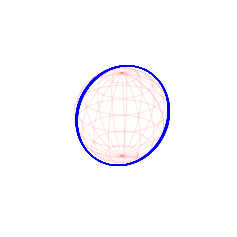

In [7]:
showResults([runSim(initial_position, initial_velocity)])

## Attitude Dynamics

### Theory

#### General Expression

We wish to find the equation of motion for a spacecraft tumbling through space. In order to do this, we can take the time derivative of the angular momentum vector.

\begin{align}
{}^{B}{\bf{H}} = {}^{B}\begin{bmatrix}H_{x} & H_{y} & H_{z}\end{bmatrix} \cdot ^{B}\begin{bmatrix}
{\bf{\hat{i}}}_{B}&
{\bf{\hat{j}}}_{B}&
{\bf{\hat{k}}}_{B}
\end{bmatrix}^{T}
\end{align}

Taking the time-derivative in an inertial frame:

\begin{align}
\overset{N}{{\bf{H}}} &= {}^{B}\begin{bmatrix}\dot{H}_{x} & \dot{H}_{y} & \dot{H}_{z}\end{bmatrix} \cdot ^{B}\begin{bmatrix}
{\bf{\hat{i}}}_{B}&
{\bf{\hat{j}}}_{B}&
{\bf{\hat{k}}}_{B}
\end{bmatrix}^{T} + 
{}^{B}\begin{bmatrix}H_{x} & H_{y} & H_{z}\end{bmatrix} \cdot ^{B}\begin{bmatrix}
{\bf{\dot{\hat{i}}}}_{B}&
{\bf{\dot{\hat{j}}}}_{B}&
{\bf{\dot{\hat{k}}}}_{B}
\end{bmatrix}^{T} = 0 \text{ (no external torques)}\\
&= \overset{B}{{\bf{H}}} + ({\bf{\omega}}^{B/N} \times {}^{B}{\bf{H}})
\end{align}

#### Chipsat and Kane Damper Angular Momenta

Write down the angular momentum vector:

\begin{align}
{\bf{H}}_{tot} = {\bf{h}}_{spacecraft} + h_{antennae}
\end{align}

The antennae dissipate energy, ultimately leading to a flatspin about chipsat maximum axis. For now, I will model them as approximately Kane Dampers.

\begin{align}
{\bf{h}}_{spacecraft} &= I_{B}\cdot {\bf{\omega}}^{B/N}\\
{\bf{h}}_{damper} &= I_{D} \cdot {\bf{\omega}}^{D/N}\\
&= I_{D}\cdot \left({\bf{\omega}}^{D/B} + {\bf{\omega}}^{B/N}\right)
\end{align}

#### Time Derivatives

In this case, the only source of torque is from the torque coils. This leads to the differential equation:

\begin{align}
\overset{N}{\bf{h}}_{spacecraft} &= I_{B} \cdot \dot{\omega}^{B/N} + \omega^{B/N} \times \left[I_{B} \cdot \omega^{B/N}\right] = \tau_{D} + \tau_{coils} = c\omega^{D/B}+\tau_{coils}\\
\overset{N}{\bf{h}}_{damper} &= I_{D} \cdot \dot{\omega}^{D/N} + \omega^{B/N} \times \left[I_{D} \cdot \omega^{D/N}\right] = -\tau_{D} = -c\omega^{D/B}\\
&= I_{D} \cdot \left(\dot{\omega}^{D/B} + \dot{\omega}^{B/N}\right) + \omega^{B/N} \times \left[ I_{D} \cdot \left(\omega^{D/B} + \omega^{B/N}\right)\right] + c\omega^{D/B}
\end{align}

Solving each of the above equations:

\begin{align}
\dot{\omega}^{B/N} &= -I_{B}^{-1}\left[\omega^{B/N} \times \left[I_{B} \cdot \omega^{B/N}\right] - c\omega^{D/B} + \tau_{coil}\right]\\
\dot{\omega}^{D/B} &= -I_{D}^{-1}\left[I_{D} \cdot \dot{\omega}^{B/N} + \omega^{B/N} \times \left[ I_{D} \cdot \left(\omega^{D/B} + \omega^{B/N}\right)\right] + c\omega^{D/B}\right]\\
&= -I_{D}^{-1}\left[I_{D} \cdot \left(-I_{B}^{-1}\left[\omega^{B/N} \times \left[I_{B} \cdot \omega^{B/N}\right] - c\omega^{D/B} + \tau_{coil}\right]\right) + \omega^{B/N} \times \left[ I_{D} \cdot \left(\omega^{D/B} + \omega^{B/N}\right)\right] + c\omega^{D/B}\right]
\end{align}

where:

\begin{align}
\tau_{coils} &= \sum_{i=1}^{3}\tau_{i}\\
&= \sum_{i=1}^{3}{\bf{\mu}}_{i} \times {\bf{B}}\\
&= N\sum_{i=1}^{3}i_{i}\left({\bf{A}}_{i}\times{\bf{B}}\right)\\
&= N i_{z}\left({\bf{A}}_{z}\times{\bf{B}}\right)
\end{align}

In the above expression, $N$ is the number of loops for each torque coil, $i$ is the current in the loop, ${\bf{A}}$ is the coil area, and ${\bf{B}}$ is the magnetic field vector. Rewriting:

\begin{align}
\dot{\omega}^{B/N} &= -I_{B}^{-1}\left[\omega^{B/N} \times \left[I_{B} \cdot \omega^{B/N}\right] - c\omega^{D/B} + N i_{z}\left({\bf{A}}_{z}\times{\bf{B}}\right)\right]\\
\dot{\omega}^{D/B} &= -I_{D}^{-1}\left[I_{D} \cdot \dot{\omega}^{B/N} + \omega^{B/N} \times \left[ I_{D} \cdot \left(\omega^{D/B} + \omega^{B/N}\right)\right] + c\omega^{D/B}\right]\\
&= -I_{D}^{-1}\left[I_{D} \cdot \left(-I_{B}^{-1}\left[\omega^{B/N} \times \left[I_{B} \cdot \omega^{B/N}\right] - c\omega^{D/B} + N i_{z}\left({\bf{A}}_{z}\times{\bf{B}}\right)\right]\right) + \omega^{B/N} \times \left[ I_{D} \cdot \left(\omega^{D/B} + \omega^{B/N}\right)\right] + c\omega^{D/B}\right]
\end{align}

#### The Magnetic Field

For now, let us assume that the magnetic field is fixed in the inertial frame, and any perceived change in the direction of that field is due to spacecraft rotation. This assumption can be expressed as:

\begin{align}
{}^{B}{{\bf{B}}} &= A(q){}^{N}{\bf{B}}\\
&= \begin{bmatrix}
1 - 2q_2^2 - 2q_3^2 & 2q_1q_2 - 2q_3q_4 & 2q_1q_3 + 2q_2q_4\\
2q_1q_2 + 2q_3q_4 & 1 - 2q_1^2 - 2q_3^2 & 2q_2q_3 - 2q_1q_4\\
2q_1q_3 - 2q_2q_4 & 2q_1q_4 + 2q_2q_3 & 1 - 2q_1^2 - 2q_2^2
\end{bmatrix}{}^{N}{\bf{B}}
\end{align}

where ${}^{B}{\bf{B}}$ is the magnetic field vector in the spacecraft body frame - measured by the magnetometer. $A(q)$ is the rotation matrix formed from the spacecraft quaternion, and $q_{1,2,3,4}$ are the components of the quaternion. The rate of change of the magnetic field in the spacecraft body frame is given by:

\begin{align}
\overset{N}{{\bf{B}}} &= \overset{B}{{\bf{B}}} + \omega^{B/N} \times {}^{B}{\bf{B}} = 0 \hspace{5mm} \text{(Assuming fixed inertial magnetic field)}\\
&\rightarrow \overset{B}{\bf{B}} = -\omega^{B/N}\times{}^{B}{\bf{B}}
\end{align}

#### Quaternion

The rate of change of the quaternion is also expressed as a differential equation related to the angular velocity of the spacecraft.

\begin{align}
\dot{q} &= \frac{1}{2} \omega \otimes q\\
&= \frac{1}{2}\begin{bmatrix}
0 & \omega_{z} & -\omega_y & \omega_x\\
-\omega_z & 0 & \omega_x & \omega_y\\
\omega_y & -\omega_x & 0 & \omega_z\\
-\omega_x & -\omega_y & -\omega_z & 0
\end{bmatrix}\begin{bmatrix}
q_1 \\ q_2 \\ q_3 \\ q_4\end{bmatrix}
\end{align}

The result is a set of coupled differential equations. To solve for the motion of the spacecraft and the motion of the magnetic field in the spacecraft's frame, we numerically integrate the coupled equations. In this case, the state is $\begin{bmatrix}q_1 & q_2 & q_3 & q_4 & \omega_x & \omega_y & \omega_z & \omega^D_x & \omega^D_y & \omega^D_z & i_z\end{bmatrix}$.

### Implementation

#### Parameters

Define some parameters relevant to the rotational dynamics of the chipsat.

In [15]:
m = .006*1000                                               #spacecraft mass, g
h = .035*1000                                               #spacecraft height, mm
w = .035*1000                                               #spacecraft width, mm
d = .002*1000                                               #spacecraft depth, mm
Ib = numpy.array([[(1./12.)*m*(h**2. + d**2.), 0., 0.],
                  [0., (1./12.)*m*(w**2. + d**2.), 0.],
                  [0., 0., (1./12.)*m*(w**2. + h**2.)]])   #spacecraft inertia tensor
N=12.                                                      #number of loops in each coil
Az = numpy.array([[0., 0., h*h]]).T                        #z-direction coil surface (m^2)
A = h*h                                                    #surface area (mm^2)
B = numpy.array([[0., 0., 20e-6]]).T*1000                  #inertial magnetic field, (gram-Teslas)
mdamp = .003*1000                                          #damper mass, g
mrad = .03*1000                                            #damper radius, mm
c = 10.                                                    #damping coefficient
Id = numpy.array([[(2./5.)*mdamp*mrad**2., 0., 0.],
                  [0., (2./5.)*mdamp*mrad**2., 0.],
                  [0., 0., (2./5.)*mdamp*mrad**2.]])       #damper inertia tensor

#### Helper Functions

Some helper functions. The first forms the cross product matrix, the second forms the skew-symmetric cross product matrix for the angular velocity, and the third forms a direction cosine matrix from a quaternion.

In [16]:
def crs(vector):
    first = vector[0][0]
    second = vector[1][0]
    third = vector[2][0]
    return numpy.array([[0., -third, second],
                        [third, 0., -first],
                        [-second, first, 0.]])

def quatcrs(omega):
    wx, wy, wz = omega[0][0], omega[1][0], omega[2][0]
    return numpy.array([[0., wz, -wy, wx],
                        [-wz, 0., wx, wy],
                        [wy, -wx, 0., wz],
                        [-wx, -wy, -wz, 0.]])

def formA(q):
    q1, q2, q3, q4 = q[0][0], q[1][0], q[2][0], q[3][0]
    return numpy.array([[1. - 2.*q2**2. - 2.*q3**2., 2.*q1*q2 - 2.*q3*q4, 2.*q1*q3 + 2.*q2*q4],
                        [2.*q1*q2 + 2.*q3*q4, 1.-2.*q1**2. - 2.*q3**2., 2.*q2*q3 - 2.*q1*q4],
                        [2.*q1*q3 - 2.*q2*q4, 2.*q1*q4 + 2.*q2*q3, 1.-2.*q1**2. - 2.*q2**2.]])

#### Derivative Function

The function below takes the state as an input, and returns the derivative of each state variable.

In [17]:
def rotationalDerivative(X, t):
    #unpack
    q1, q2, q3, q4, omegax, omegay, omegaz, omegadx, omegady, omegadz, iz = X
    
    #create vectors
    quaternion = numpy.array([[q1, q2, q3, q4]]).T
    omega = numpy.array([[omegax, omegay, omegaz]]).T
    omegad = numpy.array([[omegadx, omegady, omegadz]]).T
    
    #find magnetic field
    Bvec = numpy.dot(formA(quaternion), B)#---------------------------------------magnetic field, body frame
    
    #spacecraft derivative
    control = N*iz*numpy.dot(crs(Az), Bvec)#--------------------------------------control term
    damp = c*omegad#--------------------------------------------------------------damper term
    first_term = numpy.dot(crs(omega), numpy.dot(Ib, omega))#---------------------first term in parentheses
    omega_dot = numpy.dot(-1.*pinv(Ib), first_term - damp + control)#-------------spacecraft body time derivative
    
    #damper derivative
    first_term_d = numpy.dot(Id, omega_dot)#--------------------------------------first term in parentheses
    second_term_d = numpy.dot(crs(omega), numpy.dot(Id, omegad+omega))#-----------second term in parentheses
    omegad_dot = numpy.dot(-1.*pinv(Id), first_term_d + second_term_d + damp)#----damper time derivative
    
    #quaternion derivative
    q_dot = .5*numpy.dot(quatcrs(omega), quaternion)#-----------------------------quaternion time derivative
    
    #control input derivative
    izdot = numpy.array([0])#-----------------------------------------------------control derivative
    
    #return derivatives
    derivs = numpy.hstack((q_dot.T[0], omega_dot.T[0], omegad_dot.T[0], izdot))#--derivatives
    return derivs

#### Simulation Parameters

Define parameters relevant to the simulation

In [24]:
attitudetime = numpy.arange(0, 500, .1)
initial_quaternion = numpy.array([0., 0., 0., 1.])
# initial_quaternion = numpy.array([0.7071067811865476, 0., 0.7071067811865476, 0.])
initial_quaternion = initial_quaternion/numpy.linalg.norm(initial_quaternion)
initial_omega = numpy.array([0., 1., 1.])
initial_omegad = numpy.array([0., 0., 0.])
initial_iz = numpy.array([0.])

#### Run Simulation for Single Set of Initial Conditions

In [25]:
def runAttitudeSim(initial_quaternion, initial_omega, initial_omegad, initial_iz):
    X = numpy.hstack((initial_quaternion, initial_omega, initial_omegad, initial_iz))
    return integrate.odeint(rotationalDerivative, X, attitudetime)

#### Visualize Simulation Results

The function below takes a list of attitude simulation results and plots them.

In [32]:
def showAttitudeResults(results):
    for run in results:
        plt.title('Quaternion')
        plt.xlabel('Time (sec)')
        plt.plot(attitudetime,run[:,0], label='$q_1$')
        plt.plot(attitudetime,run[:,1], label='$q_2$')
        plt.plot(attitudetime,run[:,2], label='$q_3$')
        plt.plot(attitudetime,run[:,3], label='$q_4$')
        plt.ylim([-1.1,1.1])
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.show()
    for run in results:
        plt.title('Spacecraft Angular Velocity')
        plt.xlabel('Time (sec)')
        plt.ylabel('Rad/Sec')
        plt.plot(attitudetime,run[:,4], label='$\omega_x^{B/N}$')
        plt.plot(attitudetime,run[:,5], label='$\omega_y^{B/N}$')
        plt.plot(attitudetime,run[:,6], label='$\omega_z^{B/N}$')
#         plt.plot(numpy.sqrt(numpy.array(run[:,4])**2. +
#                             numpy.array(run[:,5])**2. +
#                             numpy.array(run[:,6])**2.), 'b--', label='mag')
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.show()
    for run in results:
        plt.title('Damper Relative Angular Velocity')
        plt.xlabel('Time (sec)')
        plt.ylabel('Rad/Sec')
        plt.plot(attitudetime,run[:,7], label='$\omega_x^{D/B}$')
        plt.plot(attitudetime,run[:,8], label='$\omega_y^{D/B}$')
        plt.plot(attitudetime,run[:,9], label='$\omega_z^{D/B}$')
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.show()

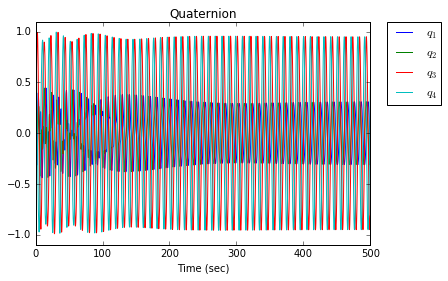

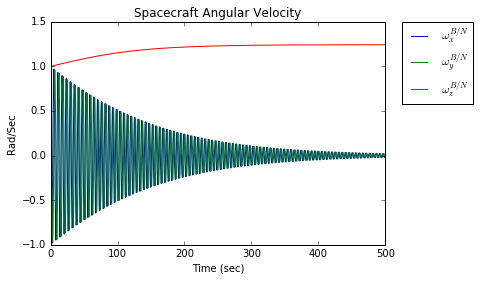

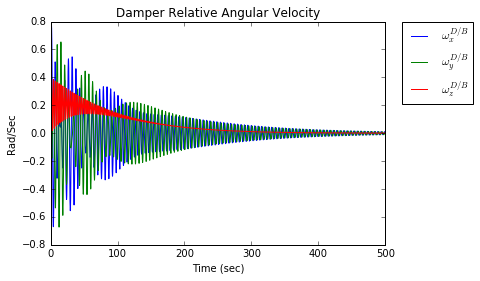

In [33]:
showAttitudeResults([runAttitudeSim(initial_quaternion, initial_omega, initial_omegad, initial_iz)])